In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,id,title,genre,user_count,session_count,total_time,payment_count,total_cash,total_reviews,one_star,two_stars,three_stars,four_stars,five_stars,price,recommend
0,00ae27c0-d33e-448e-88a5-b30e8e54be60,Method herself word class like future.,Game,1186,5806,2.882316e+08,2950,149074,1044,220,251,156,218,199,7.60,False
1,00d79cf3-de16-4c4d-9737-3b854f5a062c,Discover over choice true involve side.,Social media,1176,5901,2.979011e+08,2932,146187,891,186,116,202,229,158,8.08,False
2,00f5ead3-9214-451e-858d-15d21787dd25,Less cup whatever weight effort turn include.,Business,1137,5729,2.852369e+08,2828,145761,813,184,226,178,143,82,4.08,False
3,0146c5a7-61f0-4878-ace5-561650dad953,Brother walk always when Mrs plan trip.,Food,1202,5913,2.970030e+08,3025,153323,1033,192,254,204,204,179,5.81,False
4,01bc613a-2336-4ec0-befd-d0c8ac0eb98b,Though source easy feel. Score news great resp...,Social media,1226,6204,3.126992e+08,3052,150667,1025,192,253,198,214,168,3.91,False


In [3]:
df['mean_rate'] = (df['one_star'] + 2*df['two_stars'] + 3*df['three_stars'] + 4*df['four_stars'] + 5*df['five_stars']) / df['total_reviews']
df.head()

,id,title,genre,user_count,session_count,total_time,payment_count,total_cash,total_reviews,one_star,two_stars,three_stars,four_stars,five_stars,price,recommend,mean_rate
0,00ae27c0-d33e-448e-88a5-b30e8e54be60,Method herself word class like future.,Game,1186,5806,2.882316e+08,2950,149074,1044,220,251,156,218,199,7.60,False,2.928161
1,00d79cf3-de16-4c4d-9737-3b854f5a062c,Discover over choice true involve side.,Social media,1176,5901,2.979011e+08,2932,146187,891,186,116,202,229,158,8.08,False,3.063973
2,00f5ead3-9214-451e-858d-15d21787dd25,Less cup whatever weight effort turn include.,Business,1137,5729,2.852369e+08,2828,145761,813,184,226,178,143,82,4.08,False,2.646986
3,0146c5a7-61f0-4878-ace5-561650dad953,Brother walk always when Mrs plan trip.,Food,1202,5913,2.970030e+08,3025,153323,1033,192,254,204,204,179,5.81,False,2.926428
4,01bc613a-2336-4ec0-befd-d0c8ac0eb98b,Though source easy feel. Score news great resp...,Social media,1226,6204,3.126992e+08,3052,150667,1025,192,253,198,214,168,3.91,False,2.915122


In [4]:
data = df.drop(['id', 'title', 'recommend'], axis=1)
data = pd.get_dummies(data=data, columns=['genre'], drop_first=False)
data.head()

,user_count,session_count,total_time,payment_count,total_cash,total_reviews,one_star,two_stars,three_stars,four_stars,five_stars,price,mean_rate,genre_Business,genre_Food,genre_Game,genre_Health,genre_Music,genre_Social media
0,1186,5806,2.882316e+08,2950,149074,1044,220,251,156,218,199,7.60,2.928161,False,False,True,False,False,False
1,1176,5901,2.979011e+08,2932,146187,891,186,116,202,229,158,8.08,3.063973,False,False,False,False,False,True
2,1137,5729,2.852369e+08,2828,145761,813,184,226,178,143,82,4.08,2.646986,True,False,False,False,False,False
3,1202,5913,2.970030e+08,3025,153323,1033,192,254,204,204,179,5.81,2.926428,False,True,False,False,False,False
4,1226,6204,3.126992e+08,3052,150667,1025,192,253,198,214,168,3.91,2.915122,False,False,False,False,False,True


In [5]:
target = df['recommend']
target.head()

0    False
1    False
2    False
3    False
4    False
Name: recommend, dtype: bool

Построим baseline-модель

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

In [8]:
baseline = RandomForestClassifier()
baseline.fit(X_train, y_train)
preds = baseline.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

In [10]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       116
        True       0.89      0.94      0.91        34

    accuracy                           0.96       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.96      0.96      0.96       150



In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y_test, preds)

array([[112,   4],
       [  2,  32]], dtype=int64)

In [13]:
preds = baseline.predict(X_train)

In [14]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       264
        True       1.00      1.00      1.00        86

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



Даже baseline показывает крайне хорошие метрики

Уменьшим количество признаков. Количество признаков определим исходя из метрик кросс-валидации на baseline-модели

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
crossval_score = []

for i in range(1, data.shape[1] + 1):
    skb = SelectKBest(score_func=f_classif, k=i)
    Xreduced = skb.fit_transform(data, target)
    scores = cross_val_score(baseline, Xreduced, target, cv = 5)
    crossval_score.append(scores.mean())

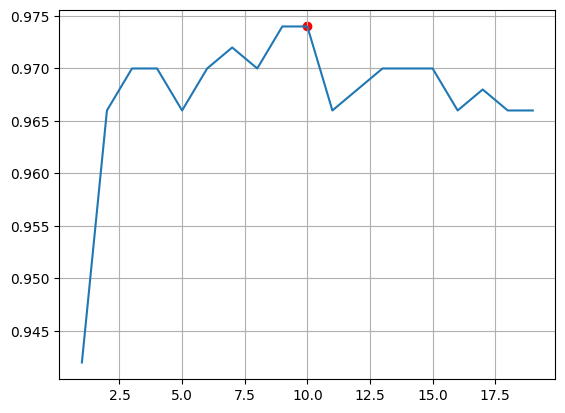

In [19]:
plt.plot(range(1, data.shape[1] + 1), crossval_score)
plt.grid()
plt.scatter(crossval_score.index(max(crossval_score)) + 1, max(crossval_score), c='r')

Максимум при $n_{components}=9$

In [20]:
skb = SelectKBest(score_func=f_classif, k=9)
X_new = skb.fit_transform(data, target)

In [21]:
X_train = skb.transform(X_train)
X_test = skb.transform(X_test)

Теперь определим оптимальные гиперпараметры модели - n_estimators, max_features и min_samples_leaf

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
grid = {
    'n_estimators': list(range(10, 100, 5)),
    'max_features': list(range(1, X_new.shape[1] + 1)),
    'min_samples_leaf': list(range(1, 15))
}

In [24]:
clf = RandomizedSearchCV(baseline, grid, random_state=42)
search = clf.fit(X_new, target)

In [25]:
search.best_params_

{'n_estimators': 90, 'min_samples_leaf': 2, 'max_features': 6}

Оценим модель с такими гиперпараметрами

In [26]:
model = RandomForestClassifier(n_estimators=90, min_samples_leaf=2, max_features=6,)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       116
        True       0.94      0.91      0.93        34

    accuracy                           0.97       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.97      0.97      0.97       150



In [27]:
confusion_matrix(y_test, preds)

array([[114,   2],
       [  3,  31]], dtype=int64)